Regression Model Trained (MSE: 0.00038)
Classification Model Trained (Accuracy: 97.00%)


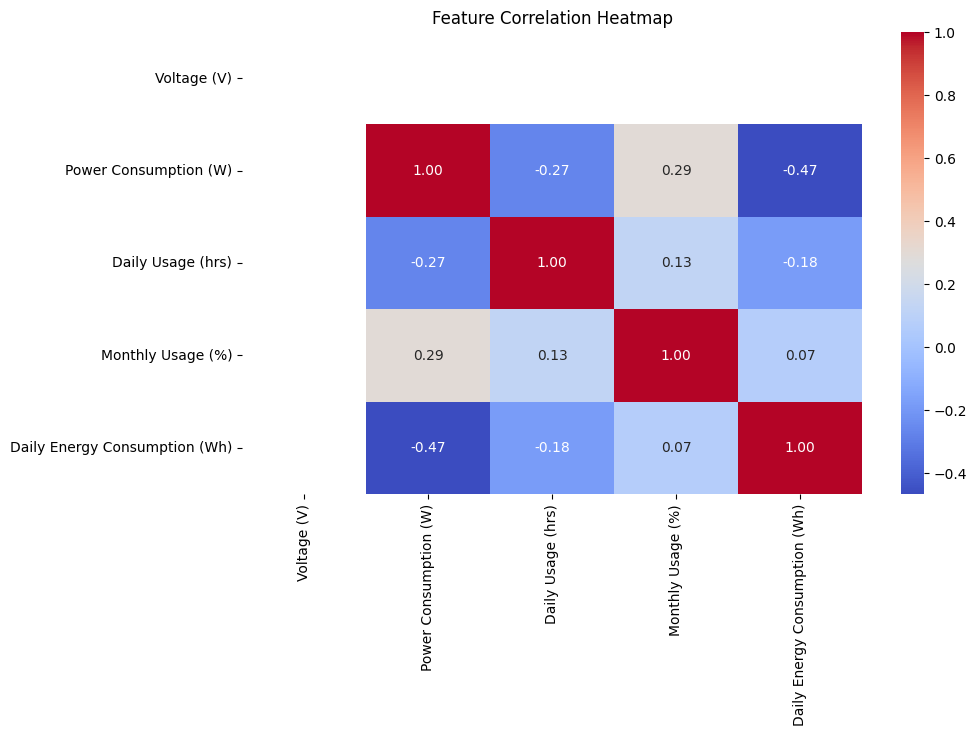

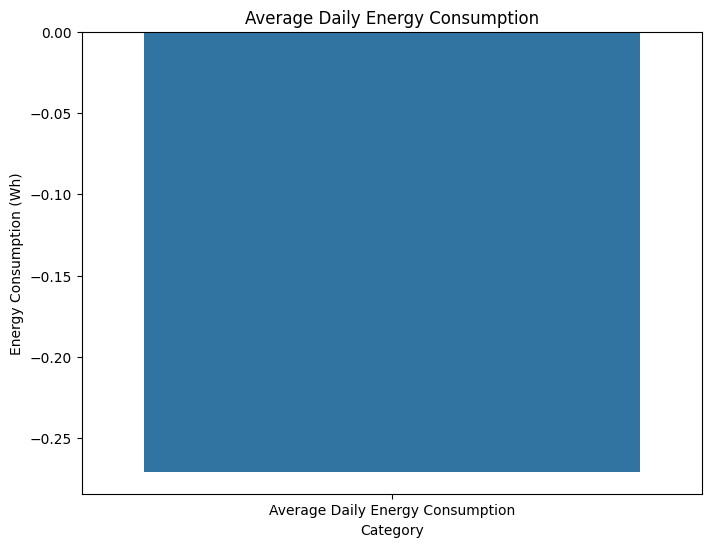

C:\Users\avina\AppData\Local\Temp\ipykernel_18396\3528005123.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.y_class, y=self.y_reg, palette="Set3")


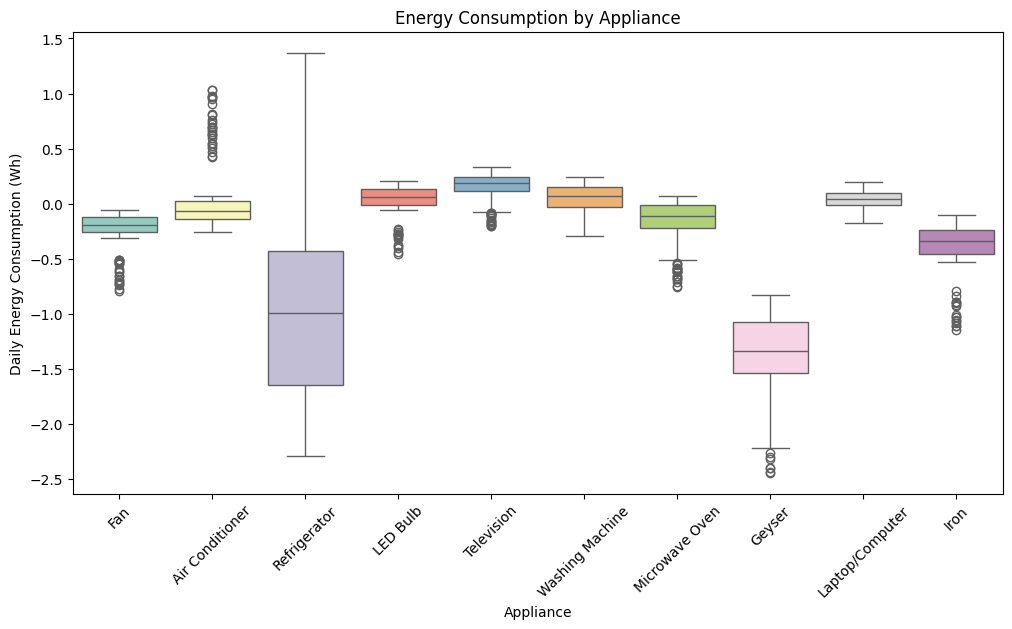

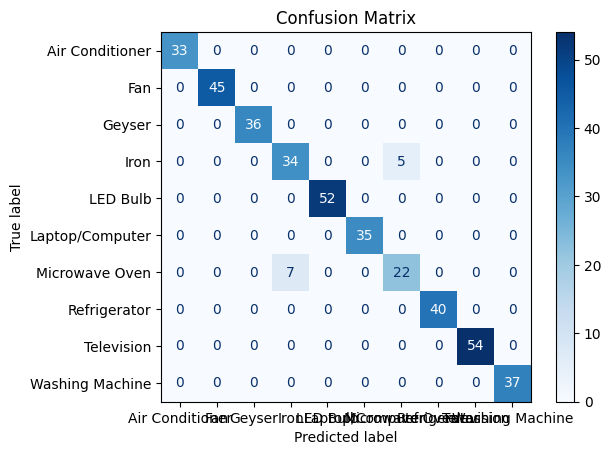

Accuracy: 97.00%
Precision: 96.99%
Recall: 97.00%
F1 Score: 96.98%
Predicted Energy Consumption: -2.30 Wh
Appliance in Use: Refrigerator
Suggestion: Avoid keeping the door open for long periods and ensure it's away from direct sunlight.
Current usage is efficient.



C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import train_test_split


class SmartEnergyManager:
    def __init__(self, data):
        # Preparing data
        self.X = data[['Voltage (V)', 'Power Consumption (W)', 'Daily Usage (hrs)', 'Monthly Usage (%)']]
        self.y_reg = data['Daily Energy Consumption (Wh)']
        self.y_class = data['Appliance']
        
        # Models
        self.regressor = DecisionTreeRegressor(random_state=42)
        self.classifier = RandomForestClassifier(random_state=42)
        
        # Train models
        self._train_models()
    
    def _train_models(self):
        # Splitting data for regression
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
            self.X, self.y_reg, test_size=0.2, random_state=42
        )
        # Splitting data for classification
        X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
            self.X, self.y_class, test_size=0.2, random_state=42
        )
        
        # Train regression model
        self.regressor.fit(X_train_reg, y_train_reg)
        y_pred_reg = self.regressor.predict(X_test_reg)
        self.regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
        
        # Train classification model
        self.classifier.fit(X_train_class, y_train_class)
        y_pred_class = self.classifier.predict(X_test_class)
        self.classification_accuracy = accuracy_score(y_test_class, y_pred_class)
        
        print(f"Regression Model Trained (MSE: {self.regression_mse:.5f})")
        print(f"Classification Model Trained (Accuracy: {self.classification_accuracy * 100:.2f}%)")
    
    def predict_energy_consumption(self, input_features):
        """
        Predicts daily energy consumption (Wh) based on input features.
        """
        return self.regressor.predict([input_features])[0]
    
    def classify_appliance_usage(self, input_features):
        """
        Classifies the appliance likely in use based on input features.
        """
        return self.classifier.predict([input_features])[0]
    
    def suggest_energy_optimization(self, input_features):
        """
        Provides suggestions for energy optimization based on predictions and classification.
        """
        predicted_consumption = self.predict_energy_consumption(input_features)
        appliance = self.classify_appliance_usage(input_features)
        
        suggestion = f"Predicted Energy Consumption: {predicted_consumption:.2f} Wh\n"
        suggestion += f"Appliance in Use: {appliance}\n"
        
        suggestions = {
            "Fan": "Consider using energy-efficient fans to reduce power consumption by up to 30%.",
            "Air Conditioner": "Set the temperature to 24-26°C and clean filters regularly for optimal efficiency.",
            "Refrigerator": "Avoid keeping the door open for long periods and ensure it's away from direct sunlight.",
            "LED Bulbs": "Replace incandescent bulbs with LEDs for up to 80% energy savings.",
            "Television": "Turn off at the power source when not in use to reduce standby power usage.",
            "Washing Machine": "Wash full loads and use the eco or cold-water setting.",
            "Microwave Oven": "Limit usage to reheating food rather than long cooking sessions.",
            "Geyser (Water Heater)": "Set the temperature to 50°C and insulate pipes for efficiency.",
            "Laptop/Computer": "Enable sleep mode and turn off screens when idle.",
            "Iron": "Iron clothes in bulk to save reheating energy."
        }
        
        if appliance in suggestions:
            suggestion += f"Suggestion: {suggestions[appliance]}\n"
        else:
            suggestion += "Suggestion: No specific suggestion available for this appliance.\n"
        
        if predicted_consumption > 500:  # Example threshold
            suggestion += "Consider reducing the usage of this appliance during peak hours.\n"
        else:
            suggestion += "Current usage is efficient.\n"
        
        return suggestion
    
    def plot_heatmap(self):
        """
        Displays a heatmap of feature correlations.
        """
        correlation_matrix = self.X.join(self.y_reg).corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Feature Correlation Heatmap")
        plt.show()

    def plot_average_energy_consumption(self):
        """
        Plots the average daily energy consumption.
        """
        avg_consumption = self.y_reg.mean()
        plt.figure(figsize=(8, 6))
        sns.barplot(x=["Average Daily Energy Consumption"], y=[avg_consumption])
        plt.title("Average Daily Energy Consumption")
        plt.ylabel("Energy Consumption (Wh)")
        plt.xlabel("Category")
        plt.show()

    def plot_appliance_energy_consumption(self):
        """
        Plots energy consumption distribution by appliance.
        """
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=self.y_class, y=self.y_reg, palette="Set3")
        plt.title("Energy Consumption by Appliance")
        plt.xlabel("Appliance")
        plt.ylabel("Daily Energy Consumption (Wh)")
        plt.xticks(rotation=45)
        plt.show()

    def show_confusion_matrix(self):
        """
        Displays the confusion matrix for the classifier.
        """
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y_class, test_size=0.2, random_state=42)
        y_pred = self.classifier.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred, labels=self.classifier.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.classifier.classes_)
        disp.plot(cmap="Blues", values_format="d")
        plt.title("Confusion Matrix")
        plt.show()
        
        self.classification_accuracy = accuracy_score(y_test, y_pred)
        self.precision = precision_score(y_test, y_pred, average='weighted')
        self.recall = recall_score(y_test, y_pred, average='weighted')
        self.f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Accuracy: {self.classification_accuracy * 100:.2f}%")
        print(f"Precision: {self.precision * 100:.2f}%")
        print(f"Recall: {self.recall * 100:.2f}%")
        print(f"F1 Score: {self.f1 * 100:.2f}%")

# Load dataset
data = pd.read_csv('Preprocessed_Household_Electricity_Consumption_Dataset.csv')

# Initialize manager
manager = SmartEnergyManager(data)

# Visualizations
manager.plot_heatmap()
manager.plot_average_energy_consumption()
manager.plot_appliance_energy_consumption()
manager.show_confusion_matrix()

# Example input for prediction
input_features = [230,82.12,8.0,19.02]
suggestion = manager.suggest_energy_optimization(input_features)

print(suggestion)
